# Model Training

In [1]:
%load_ext autoreload
%autoreload 2

import common
import pandas as pd
import scipy.sparse
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import wandb
import os 

In [2]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: nontaphat-c (nontaphat-c-nus) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## Parameters

In [ ]:
# change this accordingly
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

save_path = f"{project_path}/scicite_preprocessed"
dataset = "selected-features-glove-tfidf"
project_name = "model-comparison-glove-tfidf"

## 1. Load dataset

In [4]:
train_df = pd.read_csv(f"{save_path}/train-{dataset}.csv")
test_df = pd.read_csv(f"{save_path}/test-{dataset}.csv")
label_encoder = joblib.load(f"{save_path}/label_encoder.pkl")

X_train = train_df.drop(columns=['label'])
y_train = train_df["label"]
X_test = test_df.drop(columns=['label'])
y_test = test_df["label"]

In [5]:
X_train

citeEnd  citeStart  excerpt_index  source_acronym  source_acronymParen  \
0       175.0      168.0             11             0.0                  0.0   
1        36.0       16.0              2             0.0                  0.0   
2       228.0      225.0              0             0.0                  0.0   
3       110.0       46.0              3             0.0                  0.0   
4       239.0      234.0              2             0.0                  0.0   
...       ...        ...            ...             ...                  ...   
8236     50.0       28.0             15             0.0                  0.0   
8237    182.0      179.0              1             0.0                  0.0   
8238    120.0      108.0              8             0.0                  0.0   
8239    221.0      185.0              0             0.0                  0.0   
8240    102.0       82.0              0             0.0                  0.0   

      source_andPhrase  source_etAlPhrase  source_explicit  source_properNoun  \
0                  0.0                0.0              1.0                0.0   
1                  0.0                0.0              1.0                0.0   
2                  0.0                0.0              1.0                0.0   
3                  0.0                0.0              1.0                0.0   
4                  0.0                0.0              1.0                0.0   
...                ...                ...              ...                ...   
8236               0.0                0.0              1.0                0.0   
8237               0.0                0.0              1.0                0.0   
8238               0.0                0.0              1.0                0.0   
8239               0.0                0.0              1.0                0.0   
8240               0.0                0.0              1.0                0.0   

      isKeyCitation_False  ...  zheng_tfidf  zhou_tfidf  zhu_tfidf  \
0                     0.0  ...          0.0         0.0        0.0   
1                     0.0  ...          0.0         0.0        0.0   
2                     1.0  ...          0.0         0.0        0.0   
3                     1.0  ...          0.0         0.0        0.0   
4                     1.0  ...          0.0         0.0        0.0   
...                   ...  ...          ...         ...        ...   
8236                  0.0  ...          0.0         0.0        0.0   
8237                  0.0  ...          0.0         0.0        0.0   
8238                  1.0  ...          0.0         0.0        0.0   
8239                  0.0  ...          0.0         0.0        0.0   
8240                  0.0  ...          0.0         0.0        0.0   

      zinc_tfidf  zn_tfidf  zone_tfidf  äì_tfidf  ðþ_tfidf  βarr_tfidf  \
0            0.0       0.0         0.0       0.0       0.0         0.0   
1            0.0       0.0         0.0       0.0       0.0         0.0   
2            0.0       0.0         0.0       0.0       0.0         0.0   
3            0.0       0.0         0.0       0.0       0.0         0.0   
4            0.0       0.0         0.0       0.0       0.0         0.0   
...          ...       ...         ...       ...       ...         ...   
8236         0.0       0.0         0.0       0.0       0.0         0.0   
8237         0.0       0.0         0.0       0.0       0.0         0.0   
8238         0.0       0.0         0.0       0.0       0.0         0.0   
8239         0.0       0.0         0.0       0.0       0.0         0.0   
8240         0.0       0.0         0.0       0.0       0.0         0.0   

      μm_tfidf  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
8236       0.0  
8237       0.0  
8238       0.0  
8239       0.0  
8240       0.0  

[8241 rows x 5316 columns]

## 2. Train-validation split

In [6]:
# Split into 80% train and 20% validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 3. Train Logistic Regression 

Logistic Regression
-----Evaluation-----
Accuracy: 0.8105
Macro F1-score: 0.7777
Micro F1-score: 0.8105


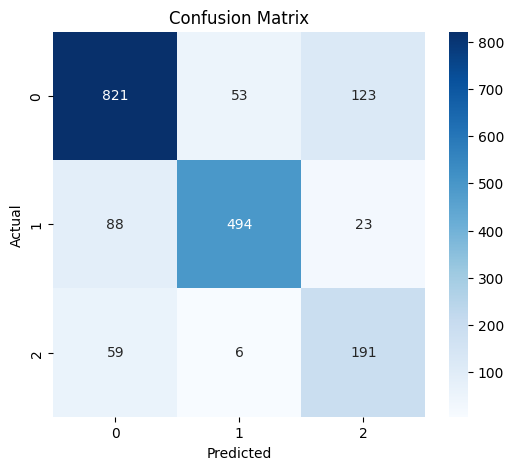

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


In [7]:
# Initialize and train model
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="logistic-regression")
common.evaluate(y_test, y_pred, label_encoder, "Logistic Regression")
wandb.finish()

## 4. Train Random Forest Classifier

Random Forest Classifier
-----Evaluation-----
Accuracy: 0.7212
Macro F1-score: 0.6149
Micro F1-score: 0.7212


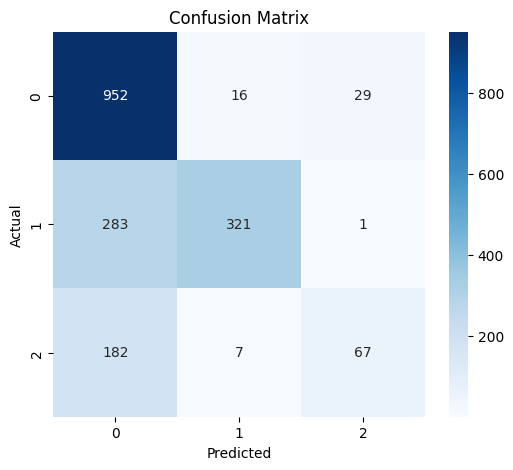

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="random-forest")
common.evaluate(y_test, y_pred_rf, label_encoder, "Random Forest Classifier")
wandb.finish()

## 5. Train Support Vector Machine (SVM)

Support Vector Machine (SVM)
-----Evaluation-----
Accuracy: 0.8014
Macro F1-score: 0.7740
Micro F1-score: 0.8014


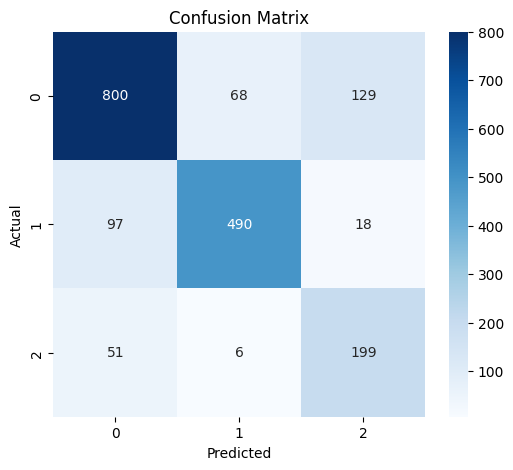

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


In [9]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

wandb.init(entity='cs4248-nlp-project',project=f"{project_name}-{dataset}", name="support-vector-machine")
common.evaluate(y_test, y_pred_svm, label_encoder, "Support Vector Machine (SVM)")
wandb.finish()